In [93]:
import sys
import numpy                as     np
import pylab                as     pl
import astropy.io.fits      as     fits
import matplotlib           as     mpl
import matplotlib.pyplot    as     plt
import astropy.io.fits      as     fits
import scipy.integrate      as     integrate

from   astropy.table        import Table
from   matplotlib.pyplot    import figure
from   desimodel.focalplane import get_tile_radius_deg
from   scipy.special        import erf

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [3]:
from   SV3.define_sample import define_sample
from   params            import params

In [13]:
trad = get_tile_radius_deg()
trad

1.6280324520485583

In [4]:
reachable = fits.open('/global/cfs/cdirs/desi/spectro/redux/everest/zcatalog/ztile-sv3-bright-cumulative.fits')
reachable.info()

Filename: /global/cfs/cdirs/desi/spectro/redux/everest/zcatalog/ztile-sv3-bright-cumulative.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  ZCATALOG      1 BinTableHDU    276   1068000R x 123C   [K, D, 10D, D, D, K, K, 6A, 20A, K, D, I, J, K, J, J, D, D, E, E, E, E, K, B, 3A, E, E, J, D, J, I, J, J, 4A, E, E, E, E, E, E, I, K, 2A, E, E, E, E, 8A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, J, I, E, I, I, E, E, E, E, D, E, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  EXP_FIBERMAP    1 BinTableHDU     61   1435500R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   


In [5]:
zcatalog = Table.read('/global/cfs/cdirs/desi/spectro/redux/everest/zcatalog/ztile-sv3-bright-cumulative.fits', hdu=1)
zcatalog

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,TILEID,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,MEAN_FIBER_X,MEAN_FIBER_Y,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG
int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int32,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int32,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
616088637154525577,7469.736961875111,343.341920185407 .. 4.461166245608293,0.1640355753964906,5.34206875304331e-05,5,7888,GALAXY,,10,2.0885551758110523,0,311,311,0,0,209.73714846971205,3.9564394849835423,0.0,0.0,0.0,5400.0,4294967296,4,SKY,79.813156,-285.5409,-1,0.9928253255644854,63,9010,354239,393,,0.0,0.0,0.0,0.0,0.0,0.0,0,0,,0.0,0.0,0.0,0.0,2096p040,0.0,0.0,0.0,0.0,0.0,0.002932687,0.050296437,-0.32439482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,-1,-1,0,0,0,0,4294967296,0,0,209.73714846971205,3.9564394849835423,147,1,547.2114,1,1,0.003,0.003,-0.006,0.006,209.73716026500415,0.0,3.956462500819131,0.0,0.7922114,79.788,-285.475,23.863243,0.013085774,4.6983557,9.864799,76.063774,38.58653,0.34747624,0.13140436,1929.5238,4.1310186,369.23856,0.0073187514,418.62964,2770.6206,1.2766074,5.9954977,3.1019076e-06,14.1808815,6.09562e-07,0.0,678.5658,4.9829587e-06,2.9812157,6.5986357,1953.3871,18.324986,373.93692,9.872117,1173.2593,2809.207,4.6052995,12.725538
39627884855296350,8.999999999999996e+99,0.0 .. 0.0,-0.0019956912923479522,4.1311493573349107e-48,1570,0,STAR,CV,3,1.942668892225729e+84,0,272,272,1,512,209.80570753935638,3.9921168242771152,0.0,0.0,2015.5,5400.0,1152921504609009673,1,TGT,62.678272,-276.09814,102100,0.3370130848906494,517,9010,354240,350,SER,1.4384575,7.465098,23.792833,514.5049,144.19394,20.042986,0,0,,0.0,0.0,0.0,0.0,2099p040,0.033253953,56.904545,38.72192,1.6268853,0.4759606,0.46754184,2.4263809,7.7333846,0.46829304,2.4274113,7.734687,6.0,1.3621521,0.09121728,-0.046635494,S,102100,9,1152921504609009673,65545,0,0,0,0,0,209.80570753935638,3.9921168242771152,147,0,0.0,1,1,0.452,0.452,-1.523,1.523,209.80748214637995,0.

In [6]:
assigned = zcatalog[(zcatalog['COADD_FIBERSTATUS'] == 0) & (zcatalog['PRIORITY'] == 102100)]
assigned

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,TILEID,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,MEAN_FIBER_X,MEAN_FIBER_Y,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG
int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int32,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int32,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
39627884855300758,8433.850174427032,1758.0062449670909 .. 66.44481740812203,0.15920254099121353,8.829989537983823e-06,0,7880,GALAXY,,10,2481.378881752491,0,233,233,6,0,210.00047738062275,4.0378902648358,0.0,0.0,2015.5,5400.0,1152921504606846976,1,TGT,14.411128,-263.98203,102100,0.9860616845196847,516,9010,354240,4758,SER,13.38418,19.71751,25.775036,401.8496,113.76485,25.801987,0,0,,0.0,0.0,0.0,0.0,2099p040,0.032174427,18.94319,13.273007,2.6478784,0.62755567,4.7221017,6.9565783,9.093747,4.7221017,6.9565783,9.093747,1.3060563,1.2625309,0.10224929,-0.5319711,S,102100,9,1152921504606846976,131074,0,0,0,0,0,210.00047738062275,4.0378902648358,147,1,547.2114,1,1,0.009,0.009,-0.004,0.004,210.0005138055289,0.0,4.037905763614628,0.0,0.74658436,14.413,-263.9,21.229078,0.011371367,4.1766515,8.418954,66.381744,34.26934,0.30179656,0.11560235,1730.6855,3.758012,331.11624,0.006322947,375.83676,2486.4934,1.1542335,5.4375362,2.9473424e-06,13.321502,5.787019e-07,0.0,634.81464,4.7246886e-06,2.7953432,6.1855435,1751.9147,17.090885,335.2929,8.425277,1077.0332,2520.7627,4.2513733,11.738682
39627884855297157,8972.85524559021,3643.7770704176205 .. 108.27061917653013,0.0588224292668431,1.599744296742454e-06,0,7893,GALAXY,,10,12065.651512145996,0,290,290,9,0,209.8390554143175,3.973093217570208,0.0,0.0,2015.5,5400.0,1152921504606846976,1,TGT,54.439507,-280.94147,102100,0.4793805714064494,516,9010,354240,1157,SER,33.829563,48.684555,60.381935,264.84125,95.0153,19.938059,0,0,,0.0,0.0,0.0,0.0,2099p040,0.033359043,38.586433,23.050617,2.0312686,0.5417762,11.01166,15.847019,19.654562,11.012104,15.84794,19.655859,3.6974928,1.3984883,-0.27717227,0.23

In [8]:
# How are cosmic splits counted?
np.unique(assigned['COADD_NUMEXP'].data, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int16),
 array([136095,  31485,   6953,   1426,      1,      1,      5,    476]))

In [9]:
template = fits.open('/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/master/data/tsnr/tsnr-ensemble-bgs.fits')
template[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TRACER  = 'bgs     '                                                            
FILTER  = 'decam2014-r'                                                         
ZLO     =                0.126                                                  
ZHI     =                 0.37                                                  
MEDMAG  =                18.87                                                  
LIMMAG  =                19.49                                                  
PSFFLOSS=                0.272                                                  
WGTFLOSS=                1.289                                                  
SMOOTH  =                100

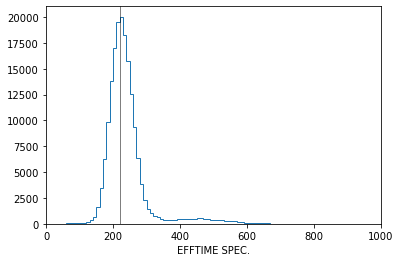

In [10]:
pl.hist(0.14 * assigned['TSNR2_BGS'], histtype='step', bins=np.arange(0.0, 1000., 10.))
pl.xlabel('EFFTIME SPEC.')
pl.xlim(0., 1000.)
pl.axvline(220., c='k', lw=0.5)

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


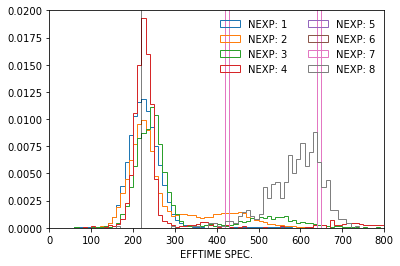

In [11]:
for nexp in np.arange(1, 9, 1):
    ss = assigned[assigned['COADD_NUMEXP'].data == nexp]
    pl.hist(0.14 * ss['TSNR2_BGS'], histtype='step', bins=np.arange(0.0, 1000., 10.), density=True, label='NEXP: {:d}'.format(nexp))

pl.xlabel('EFFTIME SPEC.')
pl.xlim(0., 800.)
pl.ylim(0.0, 0.02)
pl.axvline(220., c='k', lw=0.5)
    
pl.legend(loc=1, frameon=False, ncol=2)

In [14]:
one_tile = assigned[assigned['TILEID'] == 120]
one_tile

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,TILEID,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,MEAN_FIBER_X,MEAN_FIBER_Y,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG
int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int32,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int32,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
39628422531516009,9831.247205469757,1623.6988953990142 .. 107.57238530810368,0.06940663232261288,1.2625379509285783e-05,0,7926,GALAXY,,10,2967.96915133507,0,311,311,0,0,194.40415844003323,27.155034212422244,0.0,0.0,2015.5,5400.0,5764607523034234880,1,TGT,84.17628,-288.92725,102100,0.9901517334611527,516,9010,482432,1641,SER,158.62524,340.04428,632.26984,50.242077,16.582241,6.1996384,4096,1184912,L3,0.0,0.0,0.0,0.0,1944p272,0.010269011,572.88354,373.08328,0.4990598,0.20988281,9.650477,20.687689,38.46617,9.650478,20.68769,38.466175,1.1255391,5.5678043,0.019592667,-0.56086284,S,102100,9,5764607523034234880,131074,0,158329674399744,0,0,0,194.40415844003323,27.155034212422244,120,2,1125.3512,2,1,0.0015,0.0015811388,-0.0015,0.0015811388,194.40416509294644,0.009235931,27.155039934825435,0.0070045865,0.7397917,84.1465,-288.903,36.89612,0.021794187,7.254579,18.203146,123.44575,59.93211,0.5841314,0.20752488,3305.1985,6.923176,622.9231,0.013470092,714.2459,4547.313,2.1806822,10.1052685,5.403068e-06,22.240406,1.0539192e-06,0.0,1105.2964,8.5063875e-06,4.7885,10.694207,3342.0947,29.185375,630.1777,18.216616,1942.988,4607.245,7.5533133,21.007
39628422535709421,8319.796986728907,215.18706618567984 .. -8.446042398978912,0.3298400935921204,2.1370417324656156e-05,0,7921,GALAXY,,10,286.0078501794487,0,252,252,2,0,194.63834155894315,27.246649802625363,0.0,0.0,2015.5,5400.0,1152921504606846976,1,TGT,32.127167,-264.85974,102100,0.5791052764378485,516,9010,482433,749,SER,6.482225,19.466932,37.46808,215.31825,66.201065,17.700806,0,0,,0.0,0.0,0.0,0.0,1947p272,0.014926741,43.6363,31.424519,1.8969365,0.5045094,1.2648022,3.7983596,7.310717,1.2

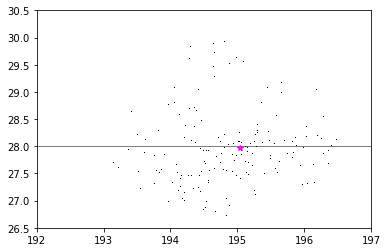

In [15]:
bad_zs = (one_tile['ZWARN'] > 0) | (one_tile['DELTACHI2'] < 40.)

pl.plot(one_tile['TARGET_RA'][bad_zs], one_tile['TARGET_DEC'][bad_zs], marker=',', lw=0.0, c='k')

pl.xlim(192., 197.)
pl.ylim(26.5, 30.5)

pl.axhline(28.0, c='k', lw=0.5)

pl.plot(195.0336, 27.9760, marker='*', c='magenta')

In [16]:
one_tile_fails        = one_tile[bad_zs & (one_tile['TARGET_DEC'] < 28.0)]
one_tile_fails['Dec'] = one_tile_fails['TARGET_DEC']
one_tile_fails['RA']  = one_tile_fails['TARGET_RA']

one_tile_fails['TARGETID', 'RA', 'Dec'].write('test.fits', format='fits', overwrite=True)

In [17]:
good_zs = assigned[(assigned['ZWARN'] == 0) & ((assigned['DELTACHI2'] > 40.))]

In [92]:
len(good_zs) / len(assigned)

0.9806678681946476

In [19]:
result = []

for tid in np.unique(assigned['TILEID']):
    n_assign = len(assigned[assigned['TILEID'] == tid])
    n_goodz  = len(good_zs[good_zs['TILEID']  == tid])
    
    zfrac    = (n_goodz / n_assign)

    result.append([tid, zfrac])

result = Table(np.array(result), names=['TILEID', 'ZFRAC'])
result.sort('ZFRAC')

Text(0.5, 0, 'BGS BRIGHT Z FRAC.')

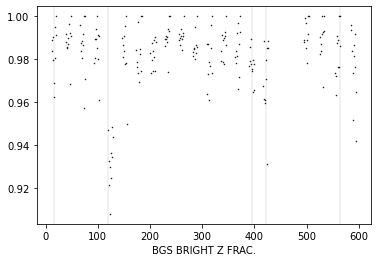

In [21]:
pl.axvline( 16, c='k', lw=0.1)
pl.axvline(120, c='k', lw=0.1)
pl.axvline(395, c='k', lw=0.1)
pl.axvline(422, c='k', lw=0.1)
pl.axvline(564, c='k', lw=0.1)

pl.plot(result['TILEID'], result['ZFRAC'], marker='.', lw=0.0, c='k', markersize=1)

pl.xlabel('TILEID')
pl.xlabel('BGS BRIGHT Z FRAC.')

In [22]:
badids = np.sort(result[result['ZFRAC'] < 0.96]['TILEID'].data.astype(np.int))
badids

array([ 73, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 156, 420,
       425, 589, 594])

73 (array([0, 1, 4, 7, 8], dtype=int16), array([1, 2, 1, 2, 1]))


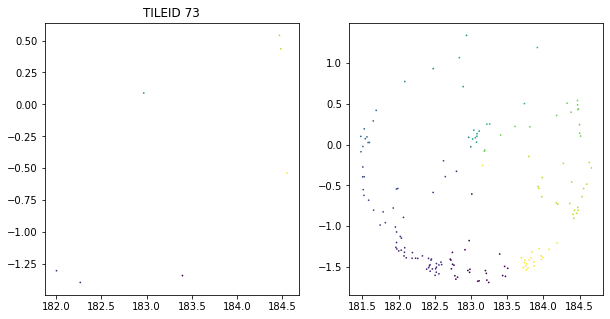

120 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int16), array([27, 28, 13,  6,  7,  9,  4,  5, 27, 29]))


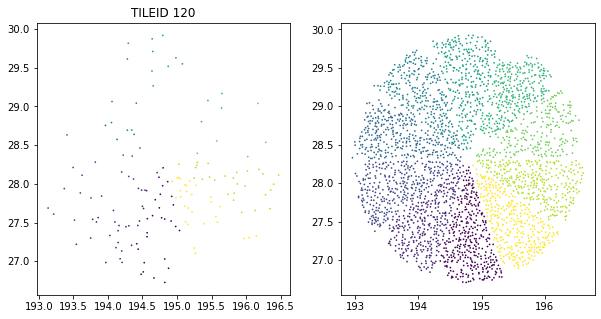

121 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int16), array([26, 28, 23, 14,  3, 19,  6, 13, 30, 24]))


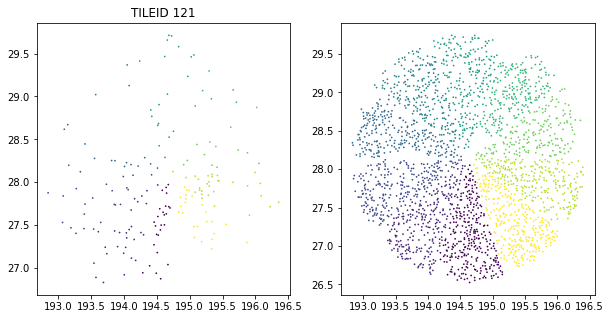

122 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int16), array([18, 20, 17,  8,  6,  7, 11,  6, 16,  8]))


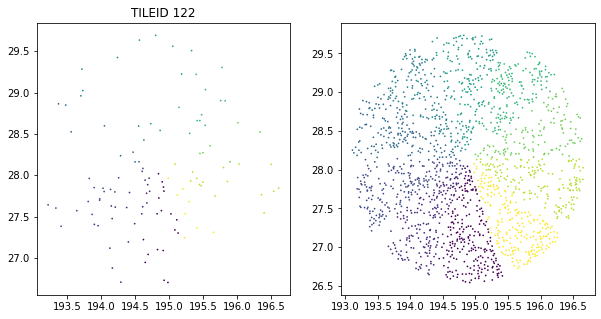

123 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int16), array([15, 12,  2,  6,  3,  4,  7,  2, 17, 17]))


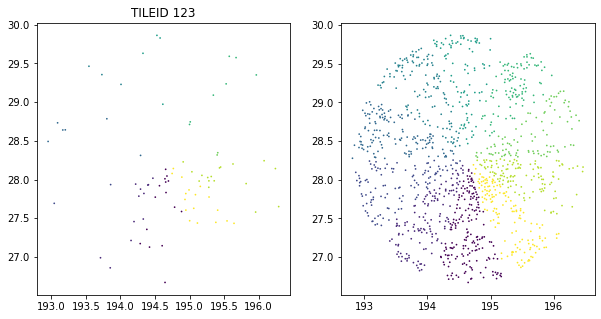

124 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int16), array([ 9,  9, 10,  3,  2,  6,  3,  6, 12, 10]))


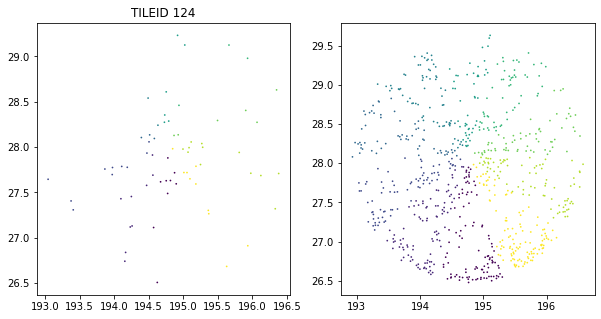

125 (array([0, 1, 3, 4, 5, 6, 7, 8, 9], dtype=int16), array([7, 4, 1, 2, 2, 4, 2, 2, 8]))


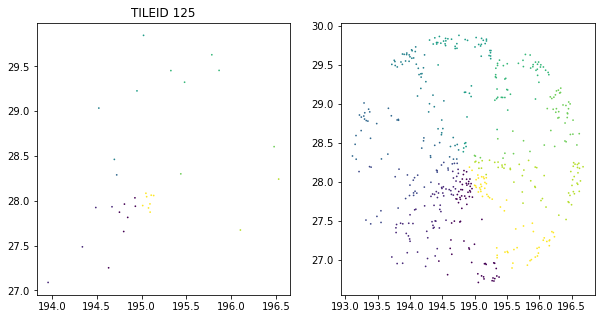

126 (array([0, 1, 2, 3, 5, 6, 7, 8, 9], dtype=int16), array([5, 2, 2, 1, 3, 3, 2, 4, 4]))


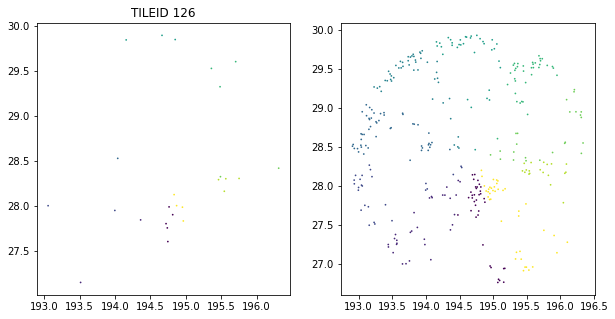

127 (array([0, 1, 4, 6, 7, 8, 9], dtype=int16), array([2, 4, 1, 1, 5, 2, 1]))


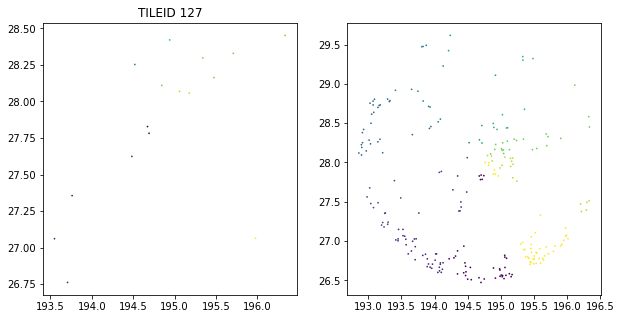

128 (array([1, 7, 8, 9], dtype=int16), array([3, 4, 1, 1]))


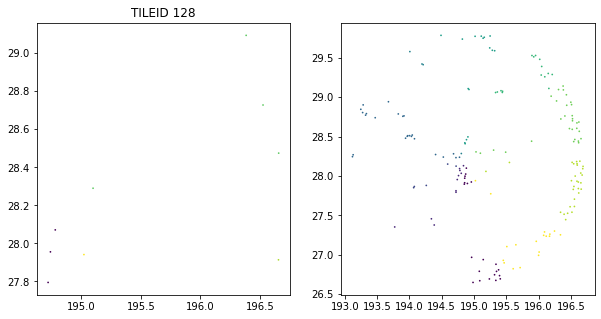

129 (array([1, 3, 7, 9], dtype=int16), array([1, 2, 2, 2]))


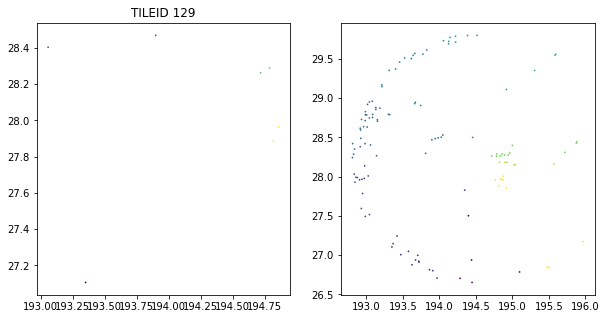

156 (array([3, 9], dtype=int16), array([5, 1]))


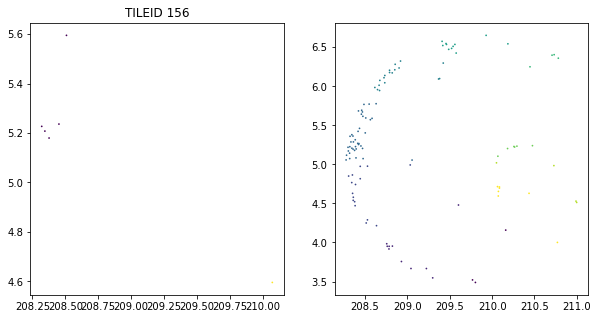

420 (array([0, 1, 2, 3, 4, 5, 6, 8, 9], dtype=int16), array([3, 2, 3, 5, 4, 5, 4, 4, 3]))


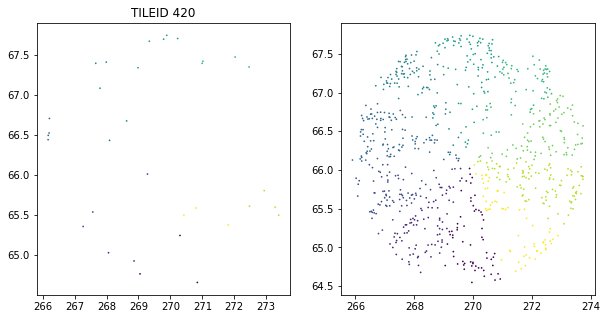

425 (array([0, 3, 7, 8], dtype=int16), array([1, 1, 2, 2]))


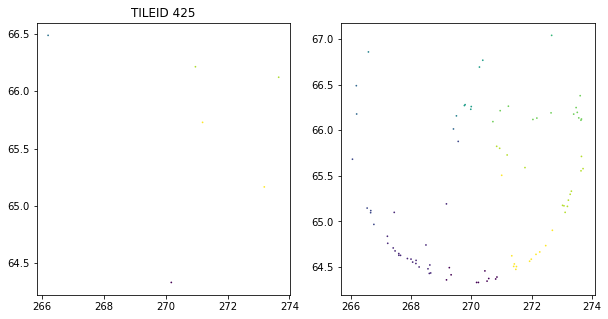

589 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int16), array([4, 1, 2, 3, 1, 1, 1, 2, 3, 5]))


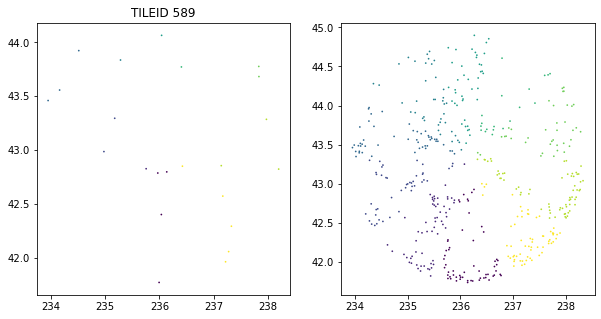

594 (array([0, 1, 2, 3], dtype=int16), array([1, 1, 1, 1]))


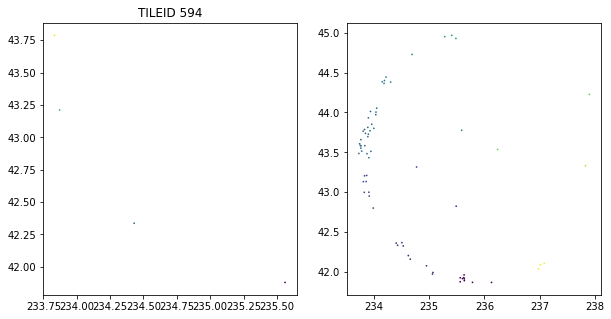

In [24]:
for tid in badids:
    fig, axes = plt.subplots(1,2, figsize=(10, 5))
    
    one_tile = assigned[assigned['TILEID'] == tid]

    bad_zs = (one_tile['ZWARN'] > 0) | (one_tile['DELTACHI2'] < 40.)

    axes[1].scatter(one_tile['TARGET_RA'],         one_tile['TARGET_DEC'],         c=one_tile['PETAL_LOC'],         marker='.', lw=0.0, s=12)
    axes[0].scatter(one_tile['TARGET_RA'][bad_zs], one_tile['TARGET_DEC'][bad_zs], c=one_tile['PETAL_LOC'][bad_zs], marker='.', lw=0.0, s=12)

    axes[0].set_title('TILEID {:d}'.format(tid))

    # axes[0].set_xlim(192., 197.)
    # axes[0].set_ylim(26.5, 29.75)
    # axes[0].axhline(28.2, c='k', lw=0.5)
    
    # axes[0].plot(195.0336, 27.9760, marker='*', c='magenta')
    
    # axes[1].set_xlim(192., 197.)
    # axes[1].set_ylim(26.5, 29.75)    
    # axes[1].axhline(28.2, c='k', lw=0.5)
    
    print(tid, np.unique(one_tile[bad_zs]['PETAL_LOC'].data, return_counts=True))
    
    pl.show()

In [25]:
def Gaussian(x, mu, sigma):
    norm = 1. / np.sqrt(2. * np.pi) / sigma
    
    return norm * np.exp(-0.5 * (x - mu)**2. / sigma / sigma)

Text(0.5, 0, '$\\log_{10}$|TSNR2 BGS|')

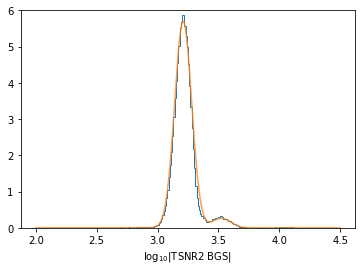

In [41]:
_  = pl.hist(np.log10(assigned['TSNR2_BGS'].data), histtype='step', bins=np.arange(2.0, 4.5, 0.01), density=True)

ts = np.arange(2.0, 4.5, 0.001)
ps = Gaussian(ts, 3.21, 0.07)

ts = np.arange(2.0, 4.5, 0.001)
qs = 0.05 * Gaussian(ts, 3.525, 0.075)

pl.plot(ts, ps + qs, alpha=0.75)

pl.ylim(0., 6.)
pl.xlabel(r'$\log_{10}$|TSNR2 BGS|')

In [42]:
def bgs_log10tsnr_prob(log10ts):
     return (Gaussian(log10ts, 3.21, 0.07) + 0.05 * Gaussian(log10ts, 3.525, 0.075)) / (1. + 0.05)    

In [71]:
integrate.quad(bgs_log10tsnr_prob, 0.0, 6.0)

(1.0000000000000004, 5.117169036370362e-09)

In [74]:
def bgs_tsnr_prob(ts):
    log10ts = np.log10(ts)

    return bgs_log10tsnr_prob(log10ts) / np.log(10.) / ts

In [75]:
integrate.quad(bgs_tsnr_prob, 0.0, 5.e4)

(1.0000000000000002, 1.556669382304465e-09)

Text(0.5, 0, 'EFFTIME SPEC.')

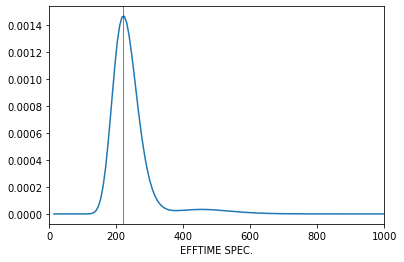

In [76]:
ts = np.arange(100., 1.e4, 50.)
ps = bgs_tsnr_prob(ts)

pl.plot(0.14 * ts, ps)
pl.axvline(220., c='k', lw=0.5)
pl.xlim(0., 1000.)
pl.xlabel(r'EFFTIME SPEC.')

Text(0.5, 0, 'EFFTIME SPEC. MAX [seconds]')

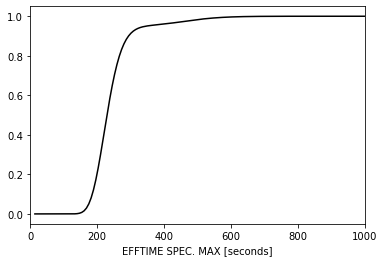

In [77]:
ts     =  np.arange(100., 1.e4, 50.)
result = [integrate.quad(bgs_tsnr_prob, 0.0, t)[0] for t in ts]

pl.plot(0.14 * ts, result, c='k')
pl.xlim(0., 1000.)
pl.xlabel(r'EFFTIME SPEC. MAX [seconds]')

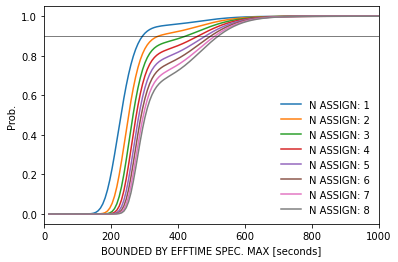

In [90]:
for nassign in np.arange(1, 9, 1):
    pl.plot(0.14 * ts, result**nassign, label='N ASSIGN: {:d}'.format(nassign))

pl.axhline(0.9, c='k', lw=0.5)
pl.xlim(0., 1000.)
pl.xlabel('BOUNDED BY EFFTIME SPEC. MAX [seconds]')
pl.ylabel('Prob.')
pl.legend(frameon=False, loc=4)

In [19]:
exp_fmap = Table.read('/global/cfs/cdirs/desi/spectro/redux/everest/zcatalog/ztile-sv3-bright-cumulative.fits', hdu=2)
exp_fmap

TARGETID,PRIORITY,SUBPRIORITY,NIGHT,EXPID,MJD,TILEID,EXPTIME,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,FIBERASSIGN_X,FIBERASSIGN_Y,LAMBDA_REF,PLATE_RA,PLATE_DEC,NUM_ITER,FIBER_X,FIBER_Y,DELTA_X,DELTA_Y,FIBER_RA,FIBER_DEC,PSF_TO_FIBER_SPECFLUX
int64,int32,float64,int32,int32,float64,int32,float64,int16,int32,int64,int32,int32,float32,float32,float32,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64
616088637154525577,-1,0.9928253255644854,20210405,83533,59310.22113753,147,547.2114,0,311,311,0,0,79.813156,-285.5409,5400.0,209.73714846971205,3.9564394849835423,2,79.788,-285.475,0.003,-0.006,209.73716026500415,3.956462500819131,0.7922113983799589
39627884855296350,102100,0.3370130848906494,20210405,83533,59310.22113753,147,547.2114,0,272,272,1,512,62.678272,-276.09814,5400.0,209.80570753935638,3.9921168242771152,2,62.213,-274.512,0.452,-1.523,209.80748214637995,3.9980099233057196,0.0
39627884855299400,101500,0.32372807735687115,20210405,83533,59310.22113753,147,547.2114,0,252,252,2,0,29.256289,-272.58145,5400.0,209.94050693418433,4.0047352323985494,2,29.252,-272.505,0.009,-0.003,209.94054327546627,4.004746715733715,0.7889999999999998
39627890890899912,102000,0.8678697383506575,20210405,83533,59310.22113753,147,547.2114,0,156,156,3,0,-1.0523221,-215.3832,5400.0,210.06332129360828,4.228659008136115,2,-1.041,-215.317,0.007,-0.004,210.06334983061288,4.2286748657267745,0.7669459496657559
39627884859492466,102000,0.7609411200985271,20210405,83533,59310.22113753,147,547.2114,0,198,198,4,0,-21.952011,-247.49173,5400.0,210.1479681764669,4.102172520801593,2,-21.931,-247.402,0.007,-0.006,210.14799666908408,4.102196117184784,0.741549844943453
39627890886707290,102000,0.9650531742170517,20210405,83533,59310.22113753,147,547.2114,0,204,204,5,0,42.611153,-239.67677,5400.0,209.8859040994771,4.133439247700404,2,42.604,-239.619,0.006,-0.002,209.88592840637006,4.133446977477515,0.7537480898677285
39627884855300758,102100,0.9860616845196847,20210405,83533,59310.22113753,147,547.2114,0,233,233,6,0,14.411128,-263.98203,5400.0,210.00047738062275,4.0378902648358,2,14.413,-263.9,0.009,-0.004,210.0005138055289,4.037905763614628,0.7465843302962897
39627890886709293,102998,0.06903387320124565,20210405,83533,59310.22113753,147,547.2114,0,172,172,7,0,18.80875,-225.95686,5400.0,209.9824482121403,4.187004209676519,2,18.826,-225.897,0.005,-0.003,209.98246853819762,4.187016018187408,0.7889999999999998
616088637154525608,-1,0.9059501396266951,20210405,83533,59310.22113753,147,547.2114,0,310,310,8,0,72.285065,-284.46573,5400.0,209.767350836901,3.9602207994424536,2,72.259,-284.403,0.008,-0.001,209.76738297428173,3.9602243143744196,0.7923107864140077


In [70]:
np.unique(exp_fmap['FIBERSTATUS'].data)

array([      0,       1,       2,       3,       8,       9,      10,
            11,     512,     513,     514,     515,     520,     521,
           522,     523,     768,     771,     776,     777,     783,
          1024,    1025,    1026,    1027,    1032,    1033,    1034,
          1035,   65536,   65537,   65538,   65544,   65545,   65547,
         66048,   66049,   66050,   66051,   66056,   66057,   66058,
         66059,   66311,   66319,   66560,   66561,   66562,   66563,
         66568,   66569,   66570,   66571, 4194304, 4194816, 4194819,
       4195072, 4195328, 4260623], dtype=int32)

In [149]:
np.unique(assigned['TILEID'].data)

array([ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 238, 255, 256, 257, 258, 259, 260, 261, 262,
       263, 264, 265, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291,
       309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 336, 337,
       338, 339, 340, 341, 342, 343, 344, 345, 346, 363, 364, 365, 366,
       367, 368, 369, 370, 371, 372, 373, 390, 391, 392, 393, 394, 395,
       396, 397, 398, 399, 400, 417, 418, 419, 420, 421, 422, 423, 424,
       425, 426, 427, 495, 496, 497, 498, 499, 500, 501, 502, 50

Text(0.5, 0, '$\\Delta \\chi^2$')

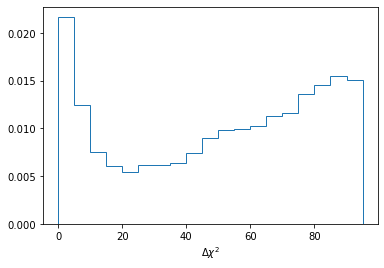

In [148]:
_ = pl.hist(assigned['DELTACHI2'].data, bins=np.arange(0., 100., 5.), histtype='step', density=True)
pl.xlabel(r'$\Delta \chi^2$')

In [41]:
tiles  = Table.read('/global/cfs/cdirs/desi/survey/ops/surveyops/trunk/ops/tiles-sv3.ecsv')
btiles = tiles[(tiles['PROGRAM'] == 'BRIGHT') & (tiles['STATUS'] == 'done')]
btiles

TILEID,PASS,RA,DEC,PROGRAM,IN_DESI,PRIORITY,STATUS,EBV_MED,DESIGNHA,DONEFRAC,AVAILABLE
int64,int32,float64,float64,str6,bool,float64,str8,float32,float32,float32,bool
12,0,150.04,2.286,BRIGHT,True,0.000e+00,done,0.022782475,0.00,1.0455,False
13,1,150.061,2.069,BRIGHT,True,0.000e+00,done,0.023243327,0.00,1.1505,False
14,2,150.212,2.226,BRIGHT,True,0.000e+00,done,0.022683823,0.00,1.0456,False
15,3,149.98,2.171,BRIGHT,True,0.000e+00,done,0.023039486,0.00,1.1052,False
16,4,150.187,2.099,BRIGHT,True,0.000e+00,done,0.023041949,0.00,1.0776,False
17,5,150.106,2.302,BRIGHT,True,0.000e+00,done,0.022638734,0.00,1.1865,False
18,6,149.993,2.237,BRIGHT,True,0.000e+00,done,0.022844847,0.00,1.4589,False
19,7,150.128,2.065,BRIGHT,True,0.000e+00,done,0.023041053,0.00,1.3565,False
20,8,150.17,2.28,BRIGHT,True,0.000e+00,done,0.02263027,0.00,1.1368,False


In [42]:
bad_btiles = btiles[np.isin(btiles['TILEID'], badids)]
bad_btiles

TILEID,PASS,RA,DEC,PROGRAM,IN_DESI,PRIORITY,STATUS,EBV_MED,DESIGNHA,DONEFRAC,AVAILABLE
int64,int32,float64,float64,str6,bool,float64,str8,float32,float32,float32,bool
120,0,194.785,28.316,BRIGHT,True,0.000e+00,done,0.01032017,0.00,1.4928,False
121,1,194.628,28.147,BRIGHT,True,0.000e+00,done,0.010200801,0.00,1.1728,False
122,2,194.875,28.153,BRIGHT,True,0.000e+00,done,0.010217046,0.00,1.1264,False
123,3,194.645,28.276,BRIGHT,True,0.000e+00,done,0.010302404,0.00,0.9300,False
124,4,194.754,28.08,BRIGHT,True,0.000e+00,done,0.010148328,0.00,1.1169,False
125,5,194.85,28.281,BRIGHT,True,0.000e+00,done,0.010254539,8.43,1.1420,False
126,6,194.708,28.314,BRIGHT,True,0.000e+00,done,0.010299131,6.20,1.0908,False
127,7,194.68,28.097,BRIGHT,True,0.000e+00,done,0.010184649,6.52,1.1330,False
128,8,194.884,28.22,BRIGHT,True,0.000e+00,done,0.010226639,10.56,1.1001,False


(26.5, 29.75)

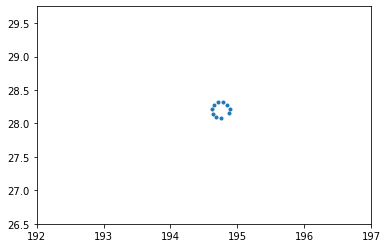

In [43]:
pl.plot(bad_btiles['RA'], bad_btiles['DEC'], marker='.', lw=0.0)

pl.xlim(192., 197.)
pl.ylim(26.5, 29.75)

In [44]:
tsnrs = Table.read('/global/cfs/cdirs/desi/spectro/redux/daily/tsnr-exposures.fits', hdu=1)
tsnrs = tsnrs[np.isin(tsnrs['TILEID'], btiles['TILEID'])]
tsnrs

NIGHT,EXPID,TILEID,SURVEY,FAPRGRM,FAFLAVOR,EXPTIME,EFFTIME_SPEC,GOALTIME,GOALTYPE,MINTFRAC,AIRMASS,EBV,SEEING_ETC,EFFTIME_ETC,TSNR2_ELG,TSNR2_QSO,TSNR2_LRG,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBDARK,TSNR2_GPBBRIGHT,TSNR2_GPBBACKUP,ELG_EFFTIME_DARK,BGS_EFFTIME_BRIGHT,LYA_EFFTIME_DARK,GPB_EFFTIME_DARK,GPB_EFFTIME_BRIGHT,GPB_EFFTIME_BACKUP,TRANSPARENCY_GFA,SEEING_GFA,FIBER_FRACFLUX_GFA,FIBER_FRACFLUX_ELG_GFA,FIBER_FRACFLUX_BGS_GFA,FIBERFAC_GFA,FIBERFAC_ELG_GFA,FIBERFAC_BGS_GFA,AIRMASS_GFA,SKY_MAG_AB_GFA,SKY_MAG_G_SPEC,SKY_MAG_R_SPEC,SKY_MAG_Z_SPEC,EFFTIME_GFA,EFFTIME_DARK_GFA,EFFTIME_BRIGHT_GFA,EFFTIME_BACKUP_GFA
int32,int32,int32,bytes7,bytes19,bytes19,float64,float64,float64,bytes7,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
20210405,83522,12,sv3,bright,sv3bright,1087.2236328125,1.8642935371398928,220.0,bright,0.9,1.2683180570602417,0.02034863829612732,1.2416000366210938,1.9704999923706055,0.21506232023239136,0.05342129245400429,0.14565566182136536,0.2176338137631117,13.31638240814209,0.0,0.0,0.0,1.8495359539985663,1.8642935371398928,2.4896781687045,0.0,0.0,0.0,0.0740698694393078,1.2750868969641278,0.46926167510731964,0.35087031639049493,0.16444694231100038,0.0583045357430305,0.05969941794132611,0.060956749956209914,1.2476632901391898,20.185822131786963,20.733287084939803,20.220435694840162,19.285456734097156,1.838273737634042,1.7455050325733383,1.838273737634042,1.7453506678932256
20210405,83526,39,sv3,bright,sv3bright,491.12127685546875,217.55007080078127,220.0,bright,0.9,1.5354160070419312,0.02328423038125038,0.0,0.0,23.347288131713867,5.886923313140869,16.4263858795166,15.539928264031186,1553.9290771484375,0.0,0.0,0.0,200.78667793273934,217.55007080078127,177.77301915181624,0.0,0.0,0.0,1.1160679283394475,1.3307057969974616,0.4410218325803964,0.33404195564548156,0.15775461328498286,0.8216242344281088,0.8451683334320832,0.8623143683992909,1.515339026465338,20.857570201417026,21.7880690448049,20.959654041792643,19.212097680116894,242.5494901823558,220.9065901518489,242.5494901823558,241.07422485485176
20210405,83527,66,sv3,bright,sv3bright,572.2549438476562,184.10497314453127,220.0,bright,0.9,1.5486550331115723,0.021584704518318176,1.5605000257492065,219.89669799804688,19.94735336303711,4.991358757019043,14.020892143249512,12.606907515740023,1315.0355224609375,0.0,0.0,0.0,171.5472389221192,184.10497314453127,144.21997149293466,0.0,0.0,0.0,1.0604372209586597,1.483372166801359,0.3927273914264954,0.3025210488076052,0.14434937212353102,0.6600202346705586,0.702521104085551,0.7302867862606071,1.5235964979314538,20.869874103784944,21.760026471805567,20.968654615911987,19.291398130669087,211.2305583366557,188.01065901557436,211.2305583366557,184.86170845015184
20210405,83528,93,sv3,bright,sv3bright,1080.5513916015625,4.601463928222657,220.0,bright,0.9,1.321005940437317,0.012340082786977291,1.45169997215271,4.131199836730957,0.527600109577179,0.13673534989356995,0.36288636922836304,0.7241035331098828,32.86759948730469,0.0,0.0,0.0,4.53736094236374,4.601463928222657,8.283569207805881,0.0,0.0,0.0,0.08465602356496543,1.0392766798987463,0.5742542783883974,0.41256853862696674,0.1891300085130472,0.07350076065776642,0.07297673241037726,0.07309977677187253,1.3038368969004397,20.129518417713655,21.292588245150938,20.153270405106035,19.359507846099117,2.5451924924787948,2.5010248223045712,2.5451924924787948,2.717450856306093
20210405,83530,120,sv3,bright,sv3bright,881.7928466796875,92.62713256835939,220.0,bright,0.9,1.2236419916152954,0.009578131139278412,1.45169997215271,82.997802734375,10.207770347595215,2.611377239227295,7.174319267272949,10.652879139455035,661.6223754882812,0.0,0.0,0.0,87.78682498931887,92.62713256835939,121.86635968350717,0.0,0.0,0.0,0.4326317754829042,1.2216886817615804,0.4990762169590266,0.36

In [45]:
np.unique(tsnrs['SURVEY'].data, return_counts=True)

(array([b'sv3', b'unknown'], dtype='|S7'), array([287,  11]))

(0.5, 2.5)

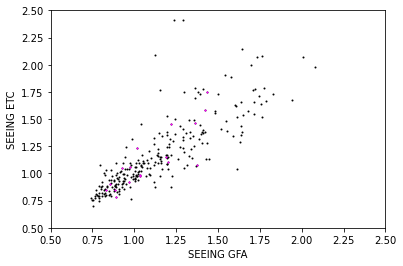

In [46]:
isin = np.isin(tsnrs['TILEID'].data, badids)

pl.plot(tsnrs['SEEING_GFA'].data,       tsnrs['SEEING_ETC'].data, c='k', lw=0.0, marker='.', markersize=2)
pl.plot(tsnrs['SEEING_GFA'].data[isin], tsnrs['SEEING_ETC'].data[isin], c='magenta', lw=0.0, marker='.', markersize=2)

pl.xlabel('SEEING GFA')
pl.ylabel('SEEING ETC')

pl.xlim(0.5, 2.5)
pl.ylim(0.5, 2.5)

In [47]:
bad_tsnrs = tsnrs[np.isin(tsnrs['TILEID'], badids)]
bad_tsnrs.sort('TILEID')
bad_tsnrs

NIGHT,EXPID,TILEID,SURVEY,FAPRGRM,FAFLAVOR,EXPTIME,EFFTIME_SPEC,GOALTIME,GOALTYPE,MINTFRAC,AIRMASS,EBV,SEEING_ETC,EFFTIME_ETC,TSNR2_ELG,TSNR2_QSO,TSNR2_LRG,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBDARK,TSNR2_GPBBRIGHT,TSNR2_GPBBACKUP,ELG_EFFTIME_DARK,BGS_EFFTIME_BRIGHT,LYA_EFFTIME_DARK,GPB_EFFTIME_DARK,GPB_EFFTIME_BRIGHT,GPB_EFFTIME_BACKUP,TRANSPARENCY_GFA,SEEING_GFA,FIBER_FRACFLUX_GFA,FIBER_FRACFLUX_ELG_GFA,FIBER_FRACFLUX_BGS_GFA,FIBERFAC_GFA,FIBERFAC_ELG_GFA,FIBERFAC_BGS_GFA,AIRMASS_GFA,SKY_MAG_AB_GFA,SKY_MAG_G_SPEC,SKY_MAG_R_SPEC,SKY_MAG_Z_SPEC,EFFTIME_GFA,EFFTIME_DARK_GFA,EFFTIME_BRIGHT_GFA,EFFTIME_BACKUP_GFA
int32,int32,int32,bytes7,bytes19,bytes19,float64,float64,float64,bytes7,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
20210405,83530,120,sv3,bright,sv3bright,881.7928466796875,92.62713256835939,220.0,bright,0.9,1.2236419916152954,0.009578131139278412,1.45169997215271,82.997802734375,10.207770347595215,2.611377239227295,7.174319267272949,10.652879139455035,661.6223754882812,0.0,0.0,0.0,87.78682498931887,92.62713256835939,121.86635968350717,0.0,0.0,0.0,0.4326317754829042,1.2216886817615804,0.4990762169590266,0.36959028969497854,0.17236335911714656,0.34976813685707864,0.35472581761312827,0.35983602876657683,1.2019296917032565,20.650148938302763,21.65834127958734,20.67353145741354,19.376191338090017,78.51761516937718,73.82824142847942,78.51761516937718,80.72108932022924
20210407,83871,120,sv3,bright,sv3bright,243.5583953857422,235.78296875,220.0,bright,0.9,1.0036309957504272,0.009578131139278412,1.051800012588501,246.21710205078125,24.418458938598633,6.263134002685547,17.295482635498047,15.961098287813366,1684.1640625,0.0,0.0,0.0,209.99874687194833,235.78296875,182.59110231358355,0.0,0.0,0.0,1.0537456177501672,0.9267283607912504,0.6500558192955507,0.46013621248360403,0.20913280810914872,1.1669378270291846,1.1264033964335778,1.1066384628399313,1.0032356460503935,21.496453758425908,22.131718800101012,21.501568246817385,19.83233757890786,228.47000029948717,218.72875556934758,228.47000029948717,286.6804017944606
20210415,84935,121,unknown,unknown,unknown,501.7322,0.0,0.0,unknown,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07312225423834932,1.2027327897701805,0.4951255533431557,0.36524570124938244,0.17012348664203492,0.6987028904221155,0.70773379647439,0.7162912060054257,1.019923324301109,21.091003265820053,21.904361518504633,21.027031060189202,19.577072433209064,0.0,0.0,0.0,0.0
20210416,85079,121,sv3,bright,sv3bright,242.39039611816406,258.0160693359375,220.0,bright,0.9,1.0315779447555542,0.009685789234936237,0.9218999743461609,241.52639770507812,28.158340454101562,7.006711006164551,19.32832908630371,16.99792964477092,1842.971923828125,0.0,0.0,0.0,242.16172790527352,258.0160693359375,194.45220215561105,0.0,0.0,0.0,1.2526705695346316,0.9687626496942262,0.5214794694369846,0.3759028437927568,0.1740367038957294,1.2434368423126076,1.1961212889951973,1.1712308280791601,1.0297832056060678,21.250170806145803,21.914073938911777,21.31795638076682,19.6007368195709,238.87116913292706,226.71885057723009,238.87116913292706,311.41974555925805
20210417,85191,122,sv3,bright,sv3bright,318.19720458984375,247.81295410156253,220.0,bright,0.9,1.0460139513015747,0.00931902602314949,0.9751999974250793,250.2259063720703,27.783504486083984,6.842196464538574,18.760801315307617,17.21516667450778,1770.092529296875,0.0,0.0,0.0,238.93813858032235,247.81295410156253,196.93734121106488,0.0,0.0,0.0,1.119922666851013,1.036010897895253,0.547206781454555,0.3928947386318253,0.18042052436603379,1.030884921636443,1.007455997263746,0.9991926603377668,1.0430407989714052,21.005264269685373,21.493895072600445,21.042590666279107,19.496782305684526,228.2197486369139,212.63483891484915,228.2197486369139,279.98017

Text(0.5, 0, 'SEEING ETC')

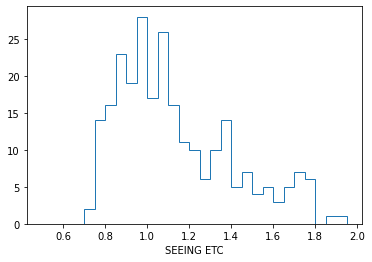

In [48]:
_ = pl.hist(tsnrs['SEEING_ETC'], histtype='step', bins=np.arange(0.5, 2.0, 0.05))
pl.xlabel('SEEING ETC')

(0.5, 2.5)

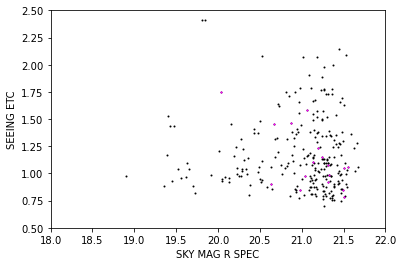

In [49]:
pl.plot(tsnrs['SKY_MAG_R_SPEC'].data, tsnrs['SEEING_ETC'].data, c='k', lw=0.0, marker='.', markersize=2)
pl.plot(bad_tsnrs['SKY_MAG_R_SPEC'].data, bad_tsnrs['SEEING_ETC'].data, c='magenta', lw=0.0, marker='.', markersize=2)

pl.xlabel('SKY MAG R SPEC')
pl.ylabel('SEEING ETC')

pl.xlim(18., 22.)
pl.ylim(0.5, 2.5)

(0.5, 2.5)

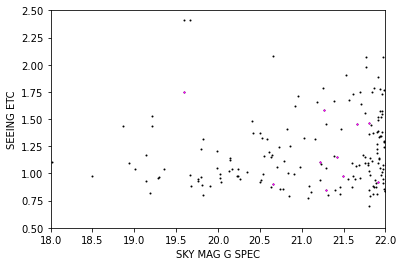

In [50]:
pl.plot(tsnrs['SKY_MAG_G_SPEC'].data, tsnrs['SEEING_ETC'].data, c='k', lw=0.0, marker='.', markersize=2)
pl.plot(bad_tsnrs['SKY_MAG_G_SPEC'].data, bad_tsnrs['SEEING_ETC'].data, c='magenta', lw=0.0, marker='.', markersize=2)

pl.xlabel('SKY MAG G SPEC')
pl.ylabel('SEEING ETC')

pl.xlim(18., 22.)
pl.ylim(0.5, 2.5)

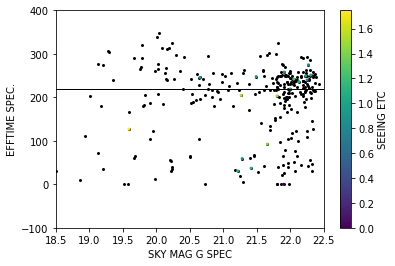

In [51]:
pl.axhline(220., c='k', lw=1.)

pl.scatter(tsnrs['SKY_MAG_G_SPEC'].data, tsnrs['EFFTIME_SPEC'].data, c='k', lw=0.0, marker='.')
pl.scatter(bad_tsnrs['SKY_MAG_G_SPEC'].data, bad_tsnrs['EFFTIME_SPEC'].data, c=bad_tsnrs['SEEING_ETC'], lw=0.0, marker='.')

pl.xlabel('SKY MAG G SPEC')
pl.ylabel('EFFTIME SPEC.')

pl.xlim(18.5, 22.5)
pl.ylim(-100, 400.)

pl.colorbar(label='SEEING ETC')

In [52]:
one_tile = assigned[assigned['TILEID'] == 120]
one_tile

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,TILEID,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,MEAN_FIBER_X,MEAN_FIBER_Y,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG
int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int32,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int32,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
39628422531516009,9831.247205469757,1623.6988953990142 .. 107.57238530810368,0.06940663232261288,1.2625379509285783e-05,0,7926,GALAXY,,10,2967.96915133507,0,311,311,0,0,194.40415844003323,27.155034212422244,0.0,0.0,2015.5,5400.0,5764607523034234880,1,TGT,84.17628,-288.92725,102100,0.9901517334611527,516,9010,482432,1641,SER,158.62524,340.04428,632.26984,50.242077,16.582241,6.1996384,4096,1184912,L3,0.0,0.0,0.0,0.0,1944p272,0.010269011,572.88354,373.08328,0.4990598,0.20988281,9.650477,20.687689,38.46617,9.650478,20.68769,38.466175,1.1255391,5.5678043,0.019592667,-0.56086284,S,102100,9,5764607523034234880,131074,0,158329674399744,0,0,0,194.40415844003323,27.155034212422244,120,2,1125.3512,2,1,0.0015,0.0015811388,-0.0015,0.0015811388,194.40416509294644,0.009235931,27.155039934825435,0.0070045865,0.7397917,84.1465,-288.903,36.89612,0.021794187,7.254579,18.203146,123.44575,59.93211,0.5841314,0.20752488,3305.1985,6.923176,622.9231,0.013470092,714.2459,4547.313,2.1806822,10.1052685,5.403068e-06,22.240406,1.0539192e-06,0.0,1105.2964,8.5063875e-06,4.7885,10.694207,3342.0947,29.185375,630.1777,18.216616,1942.988,4607.245,7.5533133,21.007
39628422535709421,8319.796986728907,215.18706618567984 .. -8.446042398978912,0.3298400935921204,2.1370417324656156e-05,0,7921,GALAXY,,10,286.0078501794487,0,252,252,2,0,194.63834155894315,27.246649802625363,0.0,0.0,2015.5,5400.0,1152921504606846976,1,TGT,32.127167,-264.85974,102100,0.5791052764378485,516,9010,482433,749,SER,6.482225,19.466932,37.46808,215.31825,66.201065,17.700806,0,0,,0.0,0.0,0.0,0.0,1947p272,0.014926741,43.6363,31.424519,1.8969365,0.5045094,1.2648022,3.7983596,7.310717,1.2

Text(0.5, 0, 'z')

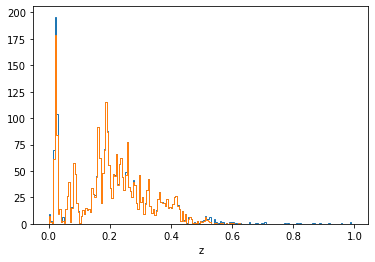

In [53]:
_    = pl.hist(one_tile['Z'], histtype='step', bins=np.arange(0.0, 1.0, 0.005))

isin = (one_tile['ZWARN'] == 0) & (one_tile['DELTACHI2'] > 40.)
_    = pl.hist(one_tile['Z'][isin], histtype='step', bins=np.arange(0.0, 1.0, 0.005))

pl.xlabel('z')

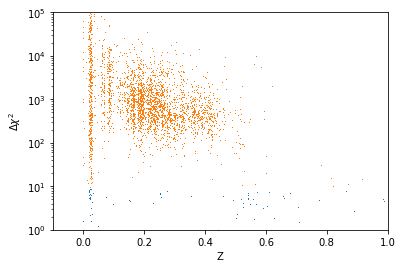

In [54]:
isin = (one_tile['ZWARN'] == 0)

pl.plot(one_tile['Z'],       one_tile['DELTACHI2'], marker=',', lw=0.0)
pl.plot(one_tile['Z'][isin], one_tile['DELTACHI2'][isin], marker=',', lw=0.0)

pl.xlabel('Z')
pl.ylabel(r'$\Delta \chi^2$')

pl.xlim(-0.1, 1.)
pl.ylim(1., 1.e5)

pl.yscale('log')

In [179]:
np.unique(one_tile['ZWARN'].data, return_counts=True)

(array([0, 4]), array([2831,  103]))

In [33]:
100. * 2439. / 2534

96.25098658247829

In [34]:
100. * 94. / 2534

3.7095501183898976

In [35]:
exp_table = Table.read('/global/cfs/cdirs/desi/spectro/redux/daily/exposure_tables/202104/exposure_table_20210405.csv')
exp_table = exp_table[exp_table['EXPID'] >= 83530]
exp_table

EXPID,EXPTIME,OBSTYPE,CAMWORD,TILEID,TARGTRA,TARGTDEC,NIGHT,PURPOSE,FA_SURV,SEQNUM,SEQTOT,PROGRAM,MJD-OBS,BADCAMWORD,BADAMPS,LASTSTEP,EXPFLAG,HEADERERR,COMMENTS
int64,float64,str7,str11,int64,float64,float64,int64,str13,str3,int64,int64,str29,float64,int64,int64,str6,str8,str1,str44
83530,881.7928,science,a0123456789,120,194.79335,28.31384,20210405,sv,sv3,1,1,bright,59310.19705736,--,--,all,aborted|,|,For EXPTIME: req=5400.0 but hdu=881.7928|
83532,457.9336,science,a0123456789,55,183.110929,0.11266,20210405,sv,sv3,1,1,dark,59310.212187903,--,--,all,aborted|,|,For EXPTIME: req=5400.0 but hdu=457.9336|
83533,547.2114,science,a0123456789,147,210.072171,5.09492,20210405,sv,sv3,1,1,bright,59310.221137591,--,--,all,aborted|,|,For EXPTIME: req=5400.0 but hdu=547.2114|
83535,378.2013,science,a0123456789,201,217.901021,34.49296,20210405,sv,sv3,1,1,bright,59310.234805512,--,--,all,aborted|,|,For EXPTIME: req=5400.0 but hdu=378.2013|
83536,304.0739,science,a0123456789,174,215.6286,52.60005,20210405,sv,sv3,1,1,bright,59310.244405731,--,--,all,aborted|,|,For EXPTIME: req=5400.0 but hdu=304.0739|
83537,672.9892,science,a0123456789,109,194.788458,28.31511,20210405,sv,sv3,1,1,dark,59310.252864774,--,--,all,aborted|,|,For EXPTIME: req=5400.0 but hdu=672.9892|
83539,1214.3304,science,a0123456789,136,210.066429,5.09744,20210405,sv,sv3,1,2,dark,59310.266090459,--,--,all,aborted|,|,For EXPTIME: req=1194.293 but hdu=1214.3304|
83540,1197.2576,science,a0123456789,136,210.06485,5.09804,20210405,sv,sv3,2,2,dark,59310.282468801,--,--,all,aborted|,|,For EXPTIME: req=1194.293 but hdu=1197.2576|
83541,620.4657,science,a0123456789,228,216.376429,-0.5107,20210405,sv,sv3,1,2,bright,59310.298901762,--,--,all,aborted|,|,For EXPTIME: req=614.412 but hdu=620.4657|


In [63]:
zslice = one_tile[(one_tile['Z'] > 0.029) & (one_tile['Z'] < 0.031)]
zslice['Z', 'TARGETID', 'LOCATION', 'RA', 'DEC', 'DELTACHI2', 'FIBER']

Z,TARGETID,LOCATION,RA,DEC,DELTACHI2,FIBER
float64,int64,int64,float64,float64,float64,int32
0.030238792279125515,39628422527322326,1280,194.1588058361733,27.21779400719889,453.68357675522566,654
0.029626726973075505,39628433260546544,1107,194.26770593760745,27.730051585433532,3470.7339336125297,641
0.02920337499843702,39628433277321914,9107,195.2742493514257,27.708878393116915,54.1264609892969,4679
0.030809479758509648,39628443960215211,8047,195.42045924887697,28.24903625522074,15984.016875445843,4125
0.030070603494957868,39628443960217337,8083,195.5492825749756,28.1756097295801,6266.076127320528,4344
0.030677948761486454,39628449278595162,7037,195.2931485786609,28.395328443619732,11.199337142170407,3981
0.029060626424433602,39628454588583604,6070,195.2930221172153,28.699740342937165,118.7568511320278,3418


In [55]:
np.unique(zslice['SPECTYPE'].data, return_counts=True)

(array([b'GALAXY'], dtype='|S6'), array([293]))

In [62]:
9107 // 1000

9

###### plot_spectra -i /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/120/20210407/coadd-9-120-thru20210407.fits --rebin 8 -t 39628433277321914 --redrock /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/120/20210407/redrock-9-120-thru20210407.fits

###### https://desidatamodel.readthedocs.io/en/latest/DESI_SPECTRO_DATA/NIGHT/EXPID/fibermap-EXPID.html?highlight=LOCATION 

###### https://data.desi.lbl.gov/desi/spectro/nightwatch/kpno/20210405/00083530/qa-summary-00083530.html

In [86]:
dat = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/test/BGS_ANYAlltiles_full.dat.fits')
dat

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,COADD_FIBERSTATUS,FIBERASSIGN_X,FIBERASSIGN_Y,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,PHOTSYS,NTILE,TILES,TILELOCIDS,LOCATION_ASSIGNED,TILELOCID_ASSIGNED,sort,COMP_TILE,rosette_number,rosette_r,FRACZ_TILELOCID,WEIGHT_ZFAIL
float64,float64,float32,float32,float32,float32,int64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,float32,float32,int16,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int16,int32,bytes8,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,bytes1,int64,bytes43,bytes143,bool,int64,float64,float64,float64,float64,float64,float64
186.61057216297232,61.714710982125084,0.0,0.0,0.0,0.0,39633407801559235,516,102000,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:06:17,0.57.0,3374,100,1003374,1e+20,1e+20 .. 1e+20,1e+20,1e+20,999999,999999,N/A,N/A,999999,1e+20,999999,999999,1e+20,1e+20,16959,1e+20,16959,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1152921504606846976,257,0,9011,622437,1865p617,2243,SER,0.01753175,6.7175236,14.104477,22.951761,231.87209,73.82909,24.421192,0.9494261,0.965645,0.9806355,2.8821654e-05,1.4283747e-05,3.798688e-05,0.0046099634,0.0040115826,0.007638155,0.999617,0.9995182,0.99988467,3,3,3,731.1993,234.01031,67.36527,528.1111,157.79251,42.53872,19.097834,12.123672,4.0204177,1.1605926,0.9970333,0.998177,0,0,0,2.5069814,5.2637944,8.565602,2.5069814,5.2637944,8.565602,0,0,0,N,1,100,1003374,False,1,1.0,0.40476190476190477,3.0,1.5587464400245565,0.5,1.0
191.14955067198017,60.34047183206205,0.0,0.0,0.0,0.0,39633390185480955,516,102000,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:06:17,0.57.0,9495,100,1009495,1e+20,1e+20 .. 1e+20,1e+20,1e+20,999999,999999,N/A,N/A,999999,1e+20,999999,999999,1e+20,1e+20,16959,1e+20,16959,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1152921504606846976,257,0,9011,618237,1912p602,763,DEV,0.013302865,3.1180577,12.051724,25.212042,343.522,88.892975,49.64499,0.9613861,0.9738223,0.9852719,1.3082532e-06,4.5848788e-07,1.2444472e-06,0.005351466,0.0040248847,0.009777258,0.9985893,0.99861467,0.9992128,3,3,3,684.4334,248.80429,

In [87]:
dat = dat[dat['TARGETID'] == 39628433277321914]
dat

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,COADD_FIBERSTATUS,FIBERASSIGN_X,FIBERASSIGN_Y,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,PHOTSYS,NTILE,TILES,TILELOCIDS,LOCATION_ASSIGNED,TILELOCID_ASSIGNED,sort,COMP_TILE,rosette_number,rosette_r,FRACZ_TILELOCID,WEIGHT_ZFAIL
float64,float64,float32,float32,float32,float32,int64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,float32,float32,int16,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int16,int32,bytes8,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,bytes1,int64,bytes43,bytes143,bool,int64,float64,float64,float64,float64,float64,float64
195.2742493514257,27.708878393116915,0.0,0.0,0.0,0.0,39628433277321914,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:05:51,0.57.0,9107,120,1209107,8227.563240556221,762.3443662311571 .. -3.8977035292891777,0.029203915718086414,4.268931587673058e-05,0,7926,GALAXY,,10,53.572724840429146,4679,0,-106.30084,-148.58156,2,1125.3512,2,0.0035,0.0049497476,-0.0005,0.0007071068,0.753636,0.039136577,34.783184,209.74182,1.0750047,0.3478212,6.686492,0.014674355,628.515,2.0307806,9.43415,24.711903,0.0,1173.559,5.2900324,11.491403,31.43753,34.79786,2011.8158,8.395818,21.273373,1152921504606846976,131074,0,9010,484994,1953p277,698,SER,0.008017715,45.024437,84.439674,128.44812,50.00956,14.924503,2.4267986,0.9765454,0.9841395,0.99109715,0.003204021,0.0031432284,0.004416525,0.016371213,0.016439978,0.037286174,0.9982984,0.99618363,0.9977278,3,3,3,1467.6998,443.1404,100.78477,955.33203,277.3455,52.406933,67.888596,35.36595,1.1774249,0.33191606,0.99864215,0.9991659,0,0,0,2.3687167,4.4423356,6.7576013,2.368722,4.442345,6.75762,0,0,0,S,9,120-121-122-123-124-126-127-128-129,1209107-1219071-1229058-1239104-1249046-1269117-1279062-1289067-1299091,True,1,2012.8157958984375,1.0,4.0,0.6750118636722577,1.0,1.0


In [85]:
redrock = fits.open('/global/cfs/cdirs/desi/spectro/redux/daily/tiles/120/20210405/zbest-9-120-20210405.fits')

zbest   = Table(redrock['ZBEST'].data)
fmap    = Table(redrock['FIBERMAP'].data)

zbest[zbest['TARGETID'] == 39628433277321914]

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,NUMEXP,NUMTILE
int64,float64,float64,float64,float64,int64,int64,str6,str20,int64,float64,int32,int32
39628433277321914,8611.902273900807,-88.90477185976837 .. -136.07269382862617,0.4963228435502763,6.949428862624439e-05,0,7855,GALAXY,,10,10.151284970343113,0,1


In [84]:
redrock = fits.open('/global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/120/00083530/redrock-9-120-exp00083530.fits')

zbest   = Table(redrock['REDSHIFTS'].data)
fmap    = Table(redrock['FIBERMAP'].data)

zbest[zbest['TARGETID'] == 39628433277321914]

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2
int64,float64,float64,float64,float64,int64,int64,str6,str20,int64,float64
39628433277321914,8645.249098025262,-93.62099388179487 .. -136.65294949521254,0.4963275355385964,6.790305146416955e-05,4,7855,GALAXY,,10,8.299765057861805


In [88]:
redrock = fits.open('/global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/120/20210407/redrock-9-120-thru20210407.fits')

zbest   = Table(redrock['REDSHIFTS'].data)
fmap    = Table(redrock['FIBERMAP'].data)

zbest[zbest['TARGETID'] == 39628433277321914]

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2
int64,float64,float64,float64,float64,int64,int64,str6,str20,int64,float64
39628433277321914,8227.563240556221,762.3443662311571 .. -3.8977035292891777,0.029203915718086414,4.268931587673058e-05,0,7926,GALAXY,,10,53.572724840429146


In [95]:
blah = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/test/BGS_ANYAlltiles_full.dat.fits')
blah

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,COADD_FIBERSTATUS,FIBERASSIGN_X,FIBERASSIGN_Y,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,PHOTSYS,NTILE,TILES,TILELOCIDS,LOCATION_ASSIGNED,TILELOCID_ASSIGNED,sort,COMP_TILE,rosette_number,rosette_r,FRACZ_TILELOCID,WEIGHT_ZFAIL
float64,float64,float32,float32,float32,float32,int64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,float32,float32,int16,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int16,int32,bytes8,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,bytes1,int64,bytes43,bytes143,bool,int64,float64,float64,float64,float64,float64,float64
186.61057216297232,61.714710982125084,0.0,0.0,0.0,0.0,39633407801559235,516,102000,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:06:17,0.57.0,3374,100,1003374,1e+20,1e+20 .. 1e+20,1e+20,1e+20,999999,999999,N/A,N/A,999999,1e+20,999999,999999,1e+20,1e+20,16959,1e+20,16959,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1152921504606846976,257,0,9011,622437,1865p617,2243,SER,0.01753175,6.7175236,14.104477,22.951761,231.87209,73.82909,24.421192,0.9494261,0.965645,0.9806355,2.8821654e-05,1.4283747e-05,3.798688e-05,0.0046099634,0.0040115826,0.007638155,0.999617,0.9995182,0.99988467,3,3,3,731.1993,234.01031,67.36527,528.1111,157.79251,42.53872,19.097834,12.123672,4.0204177,1.1605926,0.9970333,0.998177,0,0,0,2.5069814,5.2637944,8.565602,2.5069814,5.2637944,8.565602,0,0,0,N,1,100,1003374,False,1,1.0,0.40476190476190477,3.0,1.5587464400245565,0.5,1.0
191.14955067198017,60.34047183206205,0.0,0.0,0.0,0.0,39633390185480955,516,102000,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:06:17,0.57.0,9495,100,1009495,1e+20,1e+20 .. 1e+20,1e+20,1e+20,999999,999999,N/A,N/A,999999,1e+20,999999,999999,1e+20,1e+20,16959,1e+20,16959,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1152921504606846976,257,0,9011,618237,1912p602,763,DEV,0.013302865,3.1180577,12.051724,25.212042,343.522,88.892975,49.64499,0.9613861,0.9738223,0.9852719,1.3082532e-06,4.5848788e-07,1.2444472e-06,0.005351466,0.0040248847,0.009777258,0.9985893,0.99861467,0.9992128,3,3,3,684.4334,248.80429,

# Done.